# Visualizations using CSV

Take the all_cornell.csv (created by datareader.py) and do stuff with it I guess

In [63]:
import json
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [64]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


<h1> Let's load in our survey data! </h1>

In [65]:
all_data = pd.read_csv('all_cornell.csv')
all_data

,username,id,title,artist,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6cjzkudbvmwfe963clvemzwkj,3N0gL4EypJfzJ6txDnIrDS,I Know Where The Rainbow has Fallen,JANNABI,False,43,0.456,0.660,-5.480,0.0280,0.4440,0.000094,0.1120,0.246,144.014
1,6cjzkudbvmwfe963clvemzwkj,2d87kHwM5YByBhsU8qCDWg,land of night,JANNABI,False,32,0.347,0.482,-8.947,0.0306,0.8420,0.048400,0.2110,0.109,147.900
2,6cjzkudbvmwfe963clvemzwkj,2XdyebP7KxClMOse2C5iyA,Your Dog Loves You,"Colde, Crush",False,2,0.667,0.233,-11.862,0.0302,0.9280,0.000027,0.1540,0.131,101.865
3,6cjzkudbvmwfe963clvemzwkj,2BkpDA0AyGPHzyae6wWtZW,Sigh (Feat. GIRIBOY),"BIG Naughty, GIRIBOY",False,40,0.697,0.437,-7.731,0.0491,0.6740,0.000000,0.0778,0.326,119.724
4,6cjzkudbvmwfe963clvemzwkj,0BFtp5qYodX3PCaSwYPa0G,NAPPA 나빠,Crush,False,0,0.561,0.542,-7.947,0.2580,0.3940,0.000000,0.1730,0.536,161.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48637,kaybae.,7Lbxvt42JsNSKVCaN63qhD,Wonderful Christmastime [Edited Version] - Rem...,Paul McCartney,False,26,0.774,0.511,-8.914,0.0319,0.3220,0.000000,0.0672,0.771,94.736
48638,kaybae.,6tjituizSxwSmBB5vtgHZE,Holly Jolly Christmas,Michael Bublé,False,47,0.647,0.465,-8.308,0.0428,0.8650,0.000000,0.0882,0.699,151.251
48639,kaybae.,3hK0tQgnfjXwaCd0oHV0u2,K For Christmas,Lil Mosey,True,38,0.707,0.530,-9.471,0.0789,0.2340,0.004400,0.1120,0.471,189.008
48640,kaybae.,1ADjWm8QNhgNV8yCNNgQ1T,Santa Tell Me,Ariana Grande,False,0,0.464,0.630,-7.337,0.1820,0.0464,0.000000,0.2950,0.527,132.960


In [66]:
#Ex. sort by username
someones_data = all_data[all_data['username'] == 'ejlity']

someones_data2 = all_data[all_data['username'] == 'kaybae.']

someones_data

,username,id,title,artist,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1903,ejlity,4Pa5XXpn3sdBPMVCSWGEhB,Walkway Blues (feat. J Laser),"M83, J. Laser",False,40,0.543,0.615,-7.071,0.0386,0.00995,0.143000,0.0910,0.311,149.906
1904,ejlity,5e9TFTbltYBg2xThimr0rU,The Chain - 2004 Remaster,Fleetwood Mac,False,83,0.545,0.670,-8.810,0.0496,0.00900,0.000822,0.0451,0.481,151.553
1905,ejlity,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,Kings of Leon,False,78,0.276,0.715,-5.356,0.0432,0.00552,0.000417,0.2010,0.173,137.028
1906,ejlity,6Yzh272O4hwZHjrnXYhL8a,"Do It, Try It",M83,False,46,0.580,0.707,-7.355,0.0363,0.01870,0.014000,0.0340,0.156,116.949
1907,ejlity,6lpmMYLD6EyDASjLzpGnTE,Emotions,Q,False,0,0.364,0.164,-12.582,0.0415,0.80700,0.000003,0.1700,0.282,77.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,ejlity,3XJRA4TnQBEIj0l0UHz1TS,Please Come Here,Jared Mattson,False,25,0.644,0.677,-6.845,0.0447,0.15100,0.137000,0.1540,0.540,85.004
2238,ejlity,0LgXKAaGOJBUgB1eiVQVzo,Ribbons,Ryan Beatty,False,61,0.404,0.250,-13.286,0.0404,0.92600,0.014400,0.1460,0.244,137.829
2239,ejlity,17LTtoUO3vJjPYYIzF5cCp,Carry-on,Akira Ræ,False,40,0.735,0.450,-10.005,0.2040,0.61300,0.002080,0.1280,0.399,128.788
2240,ejlity,6Xkl4WQhNgZ3WhlgWfdkfU,Wan Chai,"Preservation, Nickelus F",True,41,0.515,0.679,-8.079,0.3060,0.37600,0.000000,0.1640,0.528,72.817


In [67]:
# Ex. get averages

features = ['popularity','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

feature_averages = []

for feature in features:
        avg =  someones_data[feature].mean()
        feature_averages.append(avg)

feature_averages

[28.696165191740413,
 0.4435672566371682,
 0.4088219174041298,
 -13.863026548672567,
 0.08090235988200589,
 0.5515570834808263,
 0.38394290604719755,
 0.1759041297935102,
 0.3402000000000003,
 108.68595870206484]

<h1> For all Cornellians surveyed... </h1>

In [71]:
demographics_data = pd.read_csv('all_cornell_demographics_042623.csv')

In [147]:
merged_data = pd.merge(demographics_data, all_data, on='username')
merged_data.head()

,index,Progress,Finished,Q1,Q2,Q3,Q4,Q7,Q5,Q6,...,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,43,0.456,0.660,-5.480,0.0280,0.444,0.000094,0.1120,0.246,144.014
1,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,32,0.347,0.482,-8.947,0.0306,0.842,0.048400,0.2110,0.109,147.900
2,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,2,0.667,0.233,-11.862,0.0302,0.928,0.000027,0.1540,0.131,101.865
3,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,40,0.697,0.437,-7.731,0.0491,0.674,0.000000,0.0778,0.326,119.724
4,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,0,0.561,0.542,-7.947,0.2580,0.394,0.000000,0.1730,0.536,161.867


In [148]:
colleges = ['(AS) College of Arts and Sciences','(ENG) College of Engineering',\
            '(CALS) College of Agriculture and Life Sciences','(AAP) College of Architecture, Art and Planning',\
            '(ILR) School of Industrial and Labor Relations',\
            '(HUMEC) College of Human Ecology']

song_features = ['popularity','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# loop over the colleges and song features to populate the dataframe
mean_list = []

for college in colleges:
    college_data = merged_data[merged_data['Q1'] == college]
    for song_feature in song_features:
        mean = college_data[song_feature].mean()
        mean_list.append({'college': college, 'song_feature': song_feature, 'mean': mean})

mean_df = pd.DataFrame(mean_list)

# Pivot the dataframe
mean_df = pd.pivot(mean_df, index='song_feature', columns='college', values='mean')

# Print the pivoted dataframe
mean_df

college,"(AAP) College of Architecture, Art and Planning",(AS) College of Arts and Sciences,(CALS) College of Agriculture and Life Sciences,(ENG) College of Engineering,(HUMEC) College of Human Ecology,(ILR) School of Industrial and Labor Relations
song_feature,,,,,,
acousticness,0.352427,0.372353,0.270173,0.248412,0.292792,0.194218
danceability,0.567615,0.591908,0.628672,0.604793,0.551808,0.630319
energy,0.569669,0.563734,0.601610,0.625314,0.597089,0.673122
instrumentalness,0.152407,0.122637,0.082585,0.085002,0.191677,0.034000
liveness,0.179201,0.172770,0.178925,0.182613,0.183472,0.185744
loudness,-9.389019,-8.407814,-7.892761,-7.920421,-9.054987,-6.404751
popularity,35.103667,43.621030,50.932291,52.247682,53.829952,50.735091
speechiness,0.071786,0.079109,0.111407,0.107926,0.069966,0.083940
tempo,119.835517,119.582708,120.679240,120.854449,120.373329,120.808729


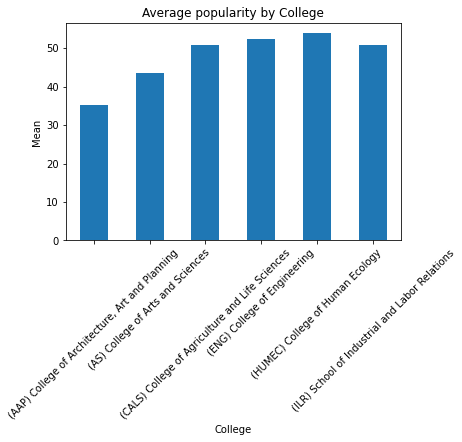

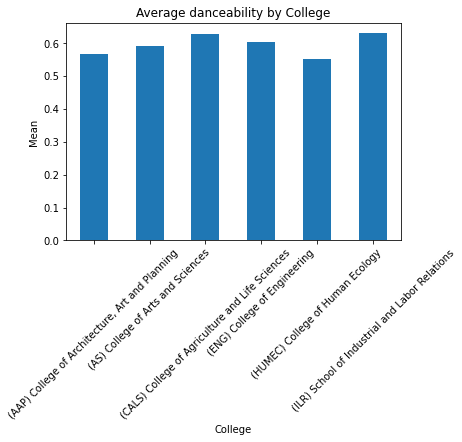

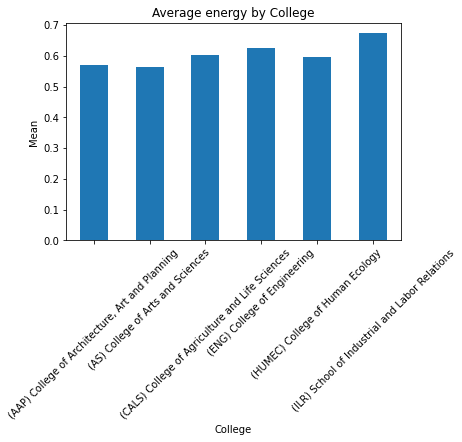

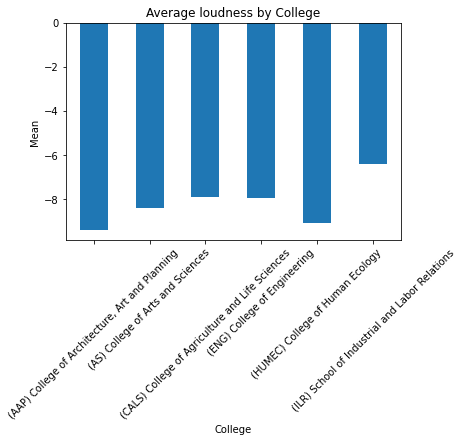

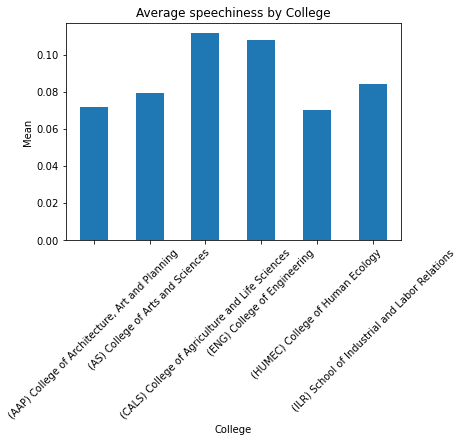

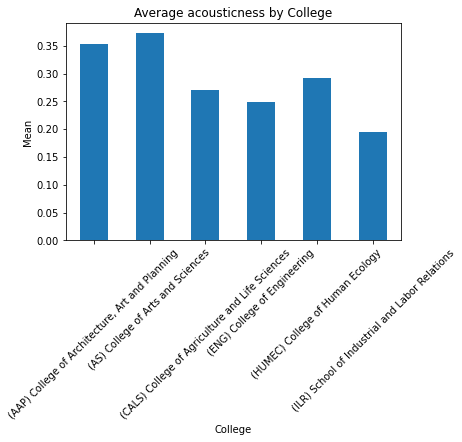

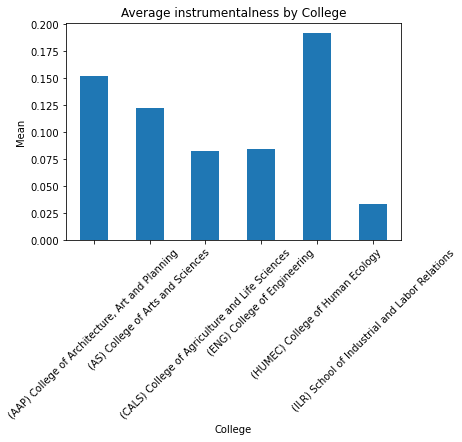

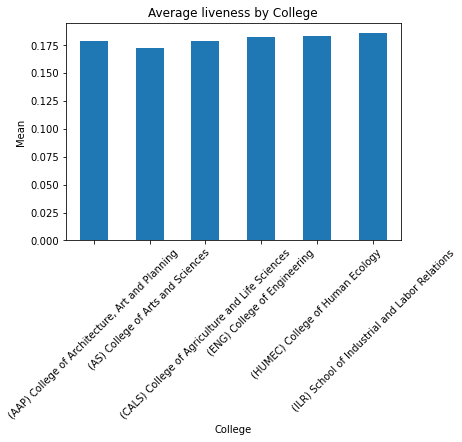

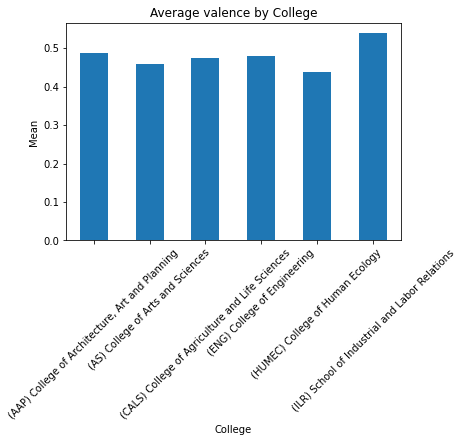

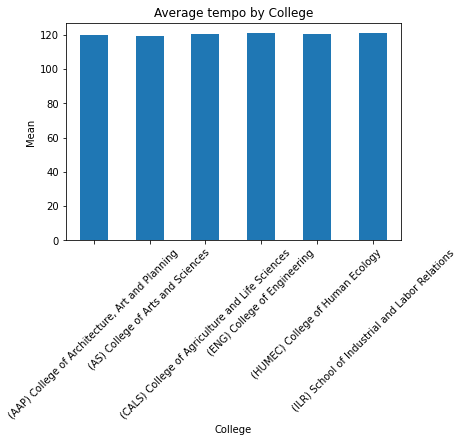

In [146]:
for feature in song_features:
    feature_df = mean_df.loc[feature]
    feature_df.plot(kind='bar')
    plt.xlabel('College')
    plt.ylabel('Mean')
    plt.title('Average '+ feature + ' by College')

    # layout stuff
    plt.xticks(rotation=45)
    plt.show()